Flipit News NLP Classification :

Objective:

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('flipitnews-data.csv')

In [3]:
df.head(3)

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...


Approach :  

1. Preprocessing 
2. generate embeddings 
3. train models like logistic regression, naive bayes, random forest, etc. 
4. check models performance against NLP based models

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
# lowercase column names 
df.columns = df.columns.str.lower()
df.columns

Index(['category', 'article'], dtype='object')

In [6]:
df["category"].value_counts()

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: category, dtype: int64

<AxesSubplot: xlabel='category', ylabel='count'>

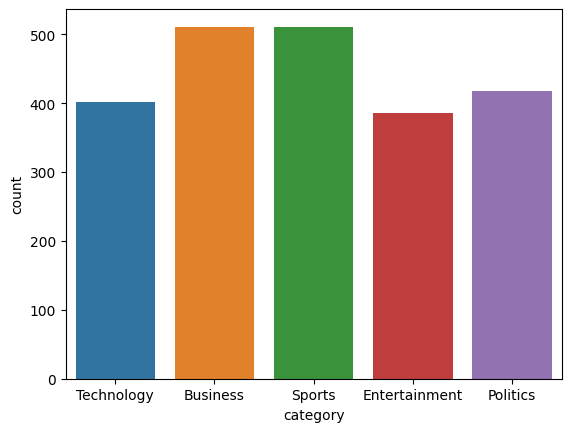

In [7]:
# checking the balance of classes 
sns.countplot(data=df, x='category')

In [8]:
# count of classes are almost equal  
# checking null values 
df.isnull().sum()

category    0
article     0
dtype: int64

In [9]:
df.shape

(2225, 2)

In [10]:
df.describe()

,category,article
count,2225,2225
unique,5,2126
top,Sports,kennedy questions trust of blair lib dem leade...
freq,511,2


In [11]:
# Text preprocessing
import re 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet') 
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mahik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# lowering the test 
df['article'] = df['article'].str.lower()
df

,category,article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,Business,cars pull down us retail figures us retail sal...
2221,Politics,kilroy unveils immigration policy ex-chatshow ...
2222,Entertainment,rem announce new glasgow concert us band rem h...
2223,Politics,how political squabbles snowball it s become c...


In [13]:
# stopwords
stop_words = stopwords.words('english')

def text_preprocessing(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if not word in stop_words]
    text = ' '.join(text)
    return text

In [14]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mahik\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
df["article"] = df["article"].apply(text_preprocessing)

In [16]:
# remove punctuation 
import string 
df["article"] = df["article"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [17]:
# encoding the target variable 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["category"] = le.fit_transform(df["category"])
df

,category,article
0,4,tv future hand viewer home theatre system plas...
1,0,worldcom bos left book alone former worldcom b...
2,3,tiger wary farrell gamble leicester say rushed...
3,3,yeading face newcastle fa cup premiership side...
4,1,ocean twelve raid box office ocean twelve crim...
...,...,...
2220,0,car pull u retail figure u retail sale fell ja...
2221,2,kilroy unveils immigration policy ex chatshow ...
2222,1,rem announce new glasgow concert u band rem an...
2223,2,political squabble snowball become commonplace...


In [18]:
#df.drop(["article"], axis=1,inplace=True)

In [19]:
#df.rename(columns={"artice": "article"}, inplace=True)

In [20]:
# function that takes input from user 1 or 2 , if 1 then count vectorizer , 2 then tfidf vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

from sklearn.model_selection import train_test_split

In [21]:
# df["len"] = df["article"].apply(lambda x: len(x.split()))
# # get max len row 
# df[df["len"] == max(df["len"])]
# df.drop(["len"], axis=1, inplace=True)

In [22]:
x_cv = count_vectorizer.fit_transform(df["article"]).toarray()
y = df["category"]  

x_tf = tfidf_vectorizer.fit_transform(df["article"]).toarray()

In [23]:

x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(x_cv, y, test_size=0.2, random_state=42)

x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(x_tf, y, test_size=0.2, random_state=42)


In [24]:
print(x_cv.shape, x_train_cv.shape, x_test_cv.shape)
print(x_tf.shape, x_train_tf.shape, x_test_tf.shape)

(2225, 5000) (1780, 5000) (445, 5000)
(2225, 5000) (1780, 5000) (445, 5000)


In [25]:
y_train_cv.values

array([1, 0, 0, ..., 4, 3, 4])

Model-building 

In [26]:
# Naive bayes 
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(x_train_cv, y_train_cv)

y_pred_cv = mnb.predict(x_test_cv)


# precison , recall , f1 score 
from sklearn.metrics import accuracy_score,  classification_report , precision_score, recall_score, f1_score

print(classification_report(y_test_cv, y_pred_cv))

# print accuracy score, precision score , recall score , f1 score 
print("accuracy :", accuracy_score(y_test_cv, y_pred_cv))
print("precision_score :", precision_score(y_test_cv, y_pred_cv, average='weighted'))
print("recall_score :", recall_score(y_test_cv, y_pred_cv, average='weighted'))
print("f1_score :", f1_score(y_test_cv, y_pred_cv, average='weighted'))




              precision    recall  f1-score   support

           0       0.98      0.92      0.95       101
           1       0.99      0.93      0.96        81
           2       0.91      0.99      0.95        83
           3       0.99      1.00      0.99        98
           4       0.95      0.99      0.97        82

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.97      0.96      0.96       445

accuracy : 0.9640449438202248
precision_score : 0.9653514481792216
recall_score : 0.9640449438202248
f1_score : 0.9639662988380215


In [27]:
# scores data frame to store accuracy , precision , recall , f1 score 
scores = pd.DataFrame(columns=["model", "accuracy", "precision", "recall", "f1_score"])

In [28]:
# appending the score of mnb model to scores data frame
scores.append({"model": "mnb", "accuracy": accuracy_score(y_test_cv, y_pred_cv),
                        "precision": precision_score(y_test_cv, y_pred_cv, average='weighted'),
                        "recall": recall_score(y_test_cv, y_pred_cv, average='weighted'),
                        "f1_score": f1_score(y_test_cv, y_pred_cv, average='weighted')}, ignore_index=True)

C:\Users\mahik\AppData\Local\Temp\ipykernel_8240\1868333114.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores.append({"model": "mnb", "accuracy": accuracy_score(y_test_cv, y_pred_cv),


,model,accuracy,precision,recall,f1_score
0,mnb,0.964045,0.965351,0.964045,0.963966


In [36]:
# we are going to repeat the same for all the model- classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB


In [44]:
# intialize the models 
mnb = MultinomialNB()
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50)
svc = SVC(kernel="sigmoid", gamma=1)
dtc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier(n_estimators=50,random_state=42)
lr = LogisticRegression(solver="liblinear", penalty="l1")
ada = AdaBoostClassifier(n_estimators=50,random_state=42)
xgb = XGBClassifier(n_estimators=50,random_state=42)
bag = BaggingClassifier(n_estimators=50,random_state=42)

In [45]:
models = {
    "mnb": mnb,
    "knn": knn,
    "rf": rf,
    "svc": svc,
    "dtc": dtc,
    "gbc": gbc,
    "lr": lr,
    "ada": ada,
    "xgb": xgb,
    "bag": bag
}

In [46]:
# functionalize the model training according to model dictonary 
def model_training(model,scores):
    model.fit(x_train_cv, y_train_cv)

    y_pred = model.predict(x_test_cv)  

    # append the score to scores data frame
    scores.loc[len(scores)] =   ({"model": model.__class__.__name__, "accuracy": accuracy_score(y_test_cv, y_pred),
                            "precision": precision_score(y_test_cv, y_pred, average='weighted'),
                            "recall": recall_score(y_test_cv, y_pred, average='weighted'),
                            "f1_score": f1_score(y_test_cv, y_pred, average='weighted')})

    return scores

In [47]:
# looping over all the models and calling the model_training function
scores = pd.DataFrame(columns=["model", "accuracy", "precision", "recall", "f1_score"])

for model in models.values():
    scores = model_training(model, scores)   

In [48]:
scores

,model,accuracy,precision,recall,f1_score
0,MultinomialNB,0.964045,0.965351,0.964045,0.963966
1,KNeighborsClassifier,0.714607,0.814228,0.714607,0.718078
2,RandomForestClassifier,0.950562,0.952531,0.950562,0.950591
3,SVC,0.314607,0.292614,0.314607,0.257106
4,DecisionTreeClassifier,0.838202,0.843085,0.838202,0.838305
5,GradientBoostingClassifier,0.943820,0.944588,0.943820,0.943977
6,LogisticRegression,0.941573,0.942786,0.941573,0.941642
7,AdaBoostClassifier,0.831461,0.840593,0.831461,0.831628
8,XGBClassifier,0.943820,0.944573,0.943820,0.943954
9,BaggingClassifier,0.887640,0.890283,0.887640,0.887328


These are all test scores of all the classifiers 


In [49]:
# we can also apply the same on the train score , cross validation for hyperparameter tuning. 

scores.sort_values(by="accuracy", ascending=False)

,model,accuracy,precision,recall,f1_score
0,MultinomialNB,0.964045,0.965351,0.964045,0.963966
2,RandomForestClassifier,0.950562,0.952531,0.950562,0.950591
5,GradientBoostingClassifier,0.943820,0.944588,0.943820,0.943977
8,XGBClassifier,0.943820,0.944573,0.943820,0.943954
6,LogisticRegression,0.941573,0.942786,0.941573,0.941642
9,BaggingClassifier,0.887640,0.890283,0.887640,0.887328
4,DecisionTreeClassifier,0.838202,0.843085,0.838202,0.838305
7,AdaBoostClassifier,0.831461,0.840593,0.831461,0.831628
1,KNeighborsClassifier,0.714607,0.814228,0.714607,0.718078
3,SVC,0.314607,0.292614,0.314607,0.257106


From the above we can observe that a simple Multinomial Naive Bayes outperformed the rest. 
It doesn't mean that it's the best model for all the use cases. 

In [ ]:
# we used count vectorizer for embeddings, we can also use tfidf vectorizer or other embedding techniques.